0.25592 Score con variables continuas sin limpiar
0.22597 Score continuas + categorical

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# machine learning
from sklearn.feature_extraction import DictVectorizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#acquire data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
#Data description in percentiles
train_df.describe()
#Distribution of categorical features
train_df.describe(include=['O'])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


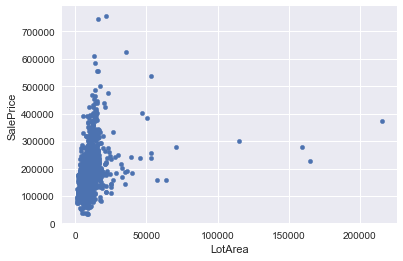

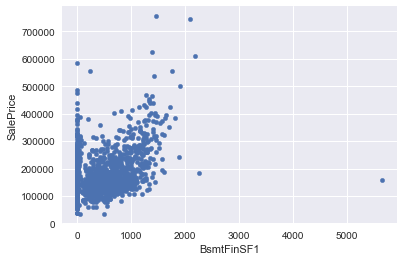

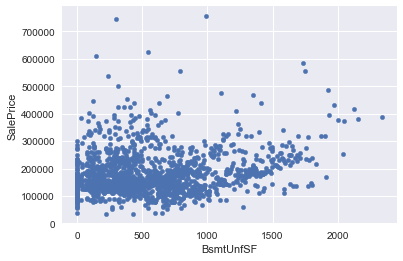

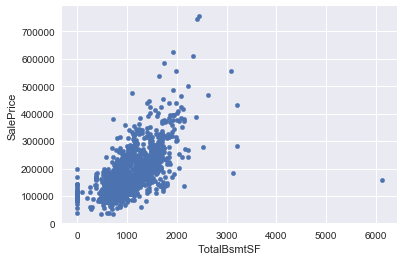

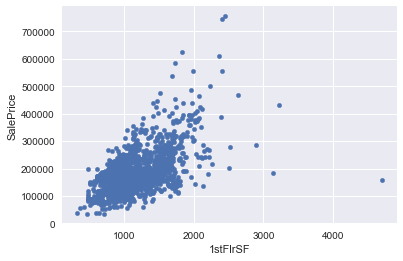

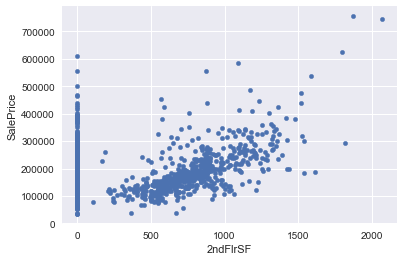

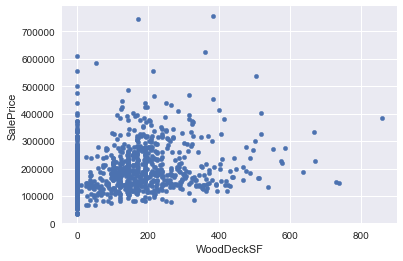

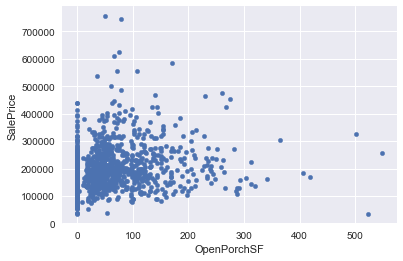

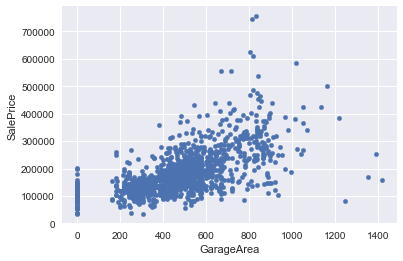

In [5]:
#Observe correlation continuous numerical features
#Use
contnum=['LotArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','WoodDeckSF','OpenPorchSF','GarageArea']
for feat in contnum:
    train_df.plot(kind='scatter',x=feat,y='SalePrice')

In [6]:
#Nouse
contnum_nouse=['LotFrontage','BsmtFinSF2','LowQualFinSF','PoolArea','MasVnrArea']
#for feat in contnum_nouse:
 #   train_df.plot(kind='scatter',x=feat,y='SalePrice')

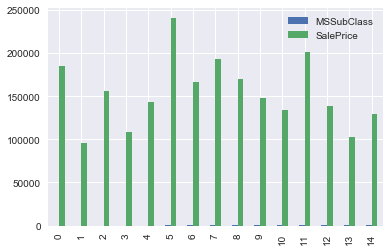

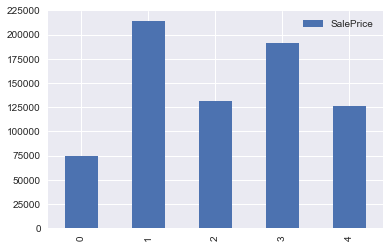

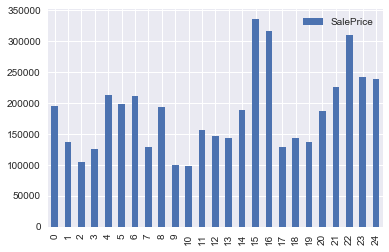

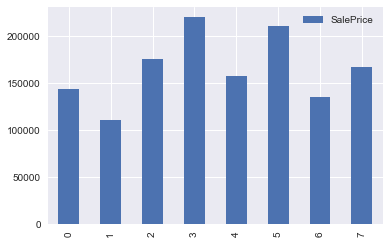

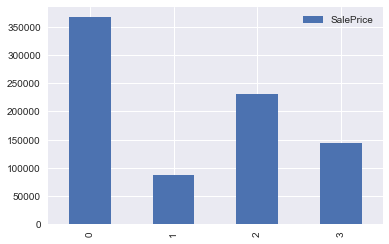

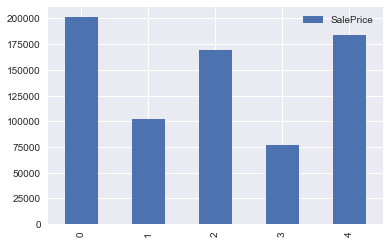

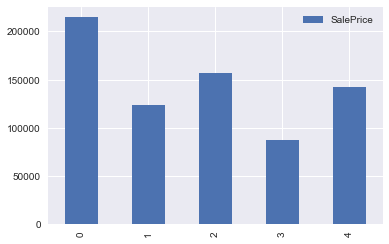

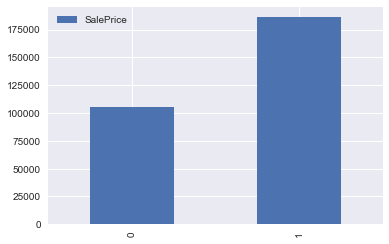

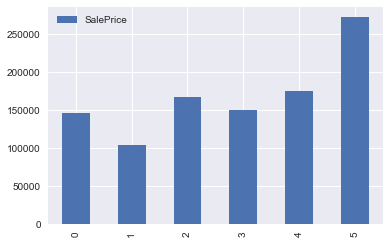

In [7]:
#Observe correlation categorical features
#Use
catfeat=['MSSubClass','MSZoning','Neighborhood','HouseStyle','ExterQual','ExterCond','HeatingQC','CentralAir','SaleCondition']

#Analyze by pivoting features
for feat in catfeat:
    train_df[[feat, 'SalePrice']].groupby([feat], as_index=False).mean().plot(kind='bar')

In [8]:
#Check for Nan
train_df[contnum].isnull().sum()
train_df[catfeat].isnull().sum()


LotArea        0
BsmtFinSF1     0
BsmtUnfSF      0
TotalBsmtSF    0
1stFlrSF       0
2ndFlrSF       0
WoodDeckSF     0
OpenPorchSF    0
GarageArea     0
dtype: int64

MSSubClass       0
MSZoning         0
Neighborhood     0
HouseStyle       0
ExterQual        0
ExterCond        0
HeatingQC        0
CentralAir       0
SaleCondition    0
dtype: int64

In [9]:
test_df[contnum].isnull().sum()
test_df[catfeat].isnull().sum()

LotArea        0
BsmtFinSF1     1
BsmtUnfSF      1
TotalBsmtSF    1
1stFlrSF       0
2ndFlrSF       0
WoodDeckSF     0
OpenPorchSF    0
GarageArea     1
dtype: int64

MSSubClass       0
MSZoning         4
Neighborhood     0
HouseStyle       0
ExterQual        0
ExterCond        0
HeatingQC        0
CentralAir       0
SaleCondition    0
dtype: int64

In [10]:
#Complete Nan for continuous feats with median
for dataset in combine:
    for feat in contnum:
        dataset[feat].fillna(value=dataset[feat].median(),inplace=True)

In [11]:
#Complete Nan for cat features with most common ocurrence
freq_port=train_df['MSZoning'].dropna().mode()[0]

for dataset in combine:
    dataset['MSZoning'] = dataset['MSZoning'].fillna(freq_port)
    dataset['Utilities'] = dataset['Utilities'].fillna(freq_port)

In [12]:
train_df['HouseStyle'].replace(to_replace='2.5Fin',value='2.5Unf',inplace=True)
test_df['MSSubClass'].replace(to_replace=150,value=40,inplace=True)



for feat in catfeat:
    a=train_df[feat].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)
    b=test_df[feat].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

    print a
    print b
    a-b

In [13]:
#Vectorize Cat features
train_df_with_dummies = pd.get_dummies( train_df[catfeat] )
test_df_with_dummies = pd.get_dummies( test_df[catfeat] )

Training

In [15]:
X_train = pd.concat([train_df[contnum],train_df_with_dummies],axis=1) #
Y_train = train_df['SalePrice']
X_test  = pd.concat([test_df[contnum],test_df_with_dummies],axis=1) #
X_train.shape,X_test.shape


((1460, 69), (1459, 69))

In [20]:
# Linear Regression

linreg = LinearRegression()
linreg.fit(X_train, Y_train)
Y_pred_Lin = linreg.predict(X_test)
acc_log = round(linreg.score(X_train, Y_train) * 100, 2)
acc_log

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

82.93

In [21]:
coeff_df = pd.DataFrame(X_train.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(linreg.coef_)

#coeff_df.sort_values(by='Correlation', ascending=False)

In [22]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred_LR = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

53.15

Me sorprende que linear de mejor score que logistic, tendre que leer el libro mas detenidamente.

A continuacion verifico las correlaciones como en el ejemplo de titanic, pero son muy bajas. Supongo que significa 
que no se ajustan al tipo de funcion (?) 

In [23]:
coeff_df = pd.DataFrame(X_train.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

#coeff_df.sort_values(by='Correlation', ascending=False)

In [24]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred_svc = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

99.38

In [25]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

33.08

In [26]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

GaussianNB(priors=None)

56.71

In [27]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      n_iter=5, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

0.07

In [28]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

1.1

In [29]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

0.14

In [30]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

99.73

In [31]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred_RF = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

0.99726027397260275

99.73

In [32]:
#Model evaluation
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
print models.sort_values(by='Score', ascending=False)

                        Model  Score
3               Random Forest  99.73
8               Decision Tree  99.73
0     Support Vector Machines  99.38
4                 Naive Bayes  56.71
2         Logistic Regression  53.15
1                         KNN  33.08
7                  Linear SVC   1.10
6  Stochastic Gradient Decent   0.14
5                  Perceptron   0.07


In [35]:
submission = pd.DataFrame({
        "Id": test_df["Id"],
        "SalePrice": Y_pred
    })
submission.to_csv('submission.csv', index=False)